## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [1]:
import os
import keras
import matplotlib.pyplot as plt
%matplotlib inline


# Disable GPU
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

In [7]:
# 載入 Callbacks
"""Code Here
設定 callbacks: Earlystop
"""
from keras.callbacks import EarlyStopping

results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

for monitar_target in ['val_loss', 'val_acc']:
    for wait_epochs in [10, 25]:
        
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)


        earlystop = EarlyStopping(monitor=monitar_target, 
                                  patience=wait_epochs, 
                                  verbose=1
                                  )

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True,
                  callbacks=[earlystop]
                 )

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]
        exp_name_tag = "monitor-{}, patience={}".format(monitar_target, wait_epochs)
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batc

Epoch 6/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.4369 - acc: 0.4977 - val_loss: 1.5969 - val_acc: 0.4337
Epoch 7/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.3983 - acc: 0.5120 - val_loss: 1.5457 - val_acc: 0.4528
Epoch 8/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.3601 - acc: 0.5271 - val_loss: 1.5278 - val_acc: 0.4611
Epoch 9/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.3268 - acc: 0.5382 - val_loss: 1.5114 - val_acc: 0.4668
Epoch 10/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.2953 - acc: 0.5500 - val_loss: 1.4990 - val_acc: 0.4672
Epoch 11/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.2657 - acc: 0.5616 - val_loss: 1.5026 - val_acc: 0.4661
Epoch 12/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.2358 - acc: 0.5717 - val_loss: 1.4910 - val_acc: 0.4747
Epoch 13/50
50000/50000 [=============

Epoch 6/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.4438 - acc: 0.4957 - val_loss: 1.5721 - val_acc: 0.4425
Epoch 7/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.4052 - acc: 0.5092 - val_loss: 1.5669 - val_acc: 0.4462
Epoch 8/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.3693 - acc: 0.5234 - val_loss: 1.5348 - val_acc: 0.4603
Epoch 9/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.3371 - acc: 0.5351 - val_loss: 1.5161 - val_acc: 0.4613
Epoch 10/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.3072 - acc: 0.5456 - val_loss: 1.5066 - val_acc: 0.4686
Epoch 11/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.2771 - acc: 0.5572 - val_loss: 1.4949 - val_acc: 0.4760
Epoch 12/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.2499 - acc: 0.5662 - val_loss: 1.4849 - val_acc: 0.4743
Epoch 13/50
50000/50000 [=============

Epoch 16/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.1497 - acc: 0.6042 - val_loss: 1.4739 - val_acc: 0.4876
Epoch 17/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.1270 - acc: 0.6146 - val_loss: 1.4647 - val_acc: 0.4893
Epoch 18/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.1019 - acc: 0.6220 - val_loss: 1.4735 - val_acc: 0.4891
Epoch 19/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.0797 - acc: 0.6307 - val_loss: 1.4500 - val_acc: 0.4973
Epoch 20/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.0586 - acc: 0.6401 - val_loss: 1.4558 - val_acc: 0.4988
Epoch 21/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.0353 - acc: 0.6466 - val_loss: 1.4571 - val_acc: 0.4922
Epoch 22/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.0147 - acc: 0.6540 - val_loss: 1.4592 - val_acc: 0.5017
Epoch 23/50
50000/50000 [=========

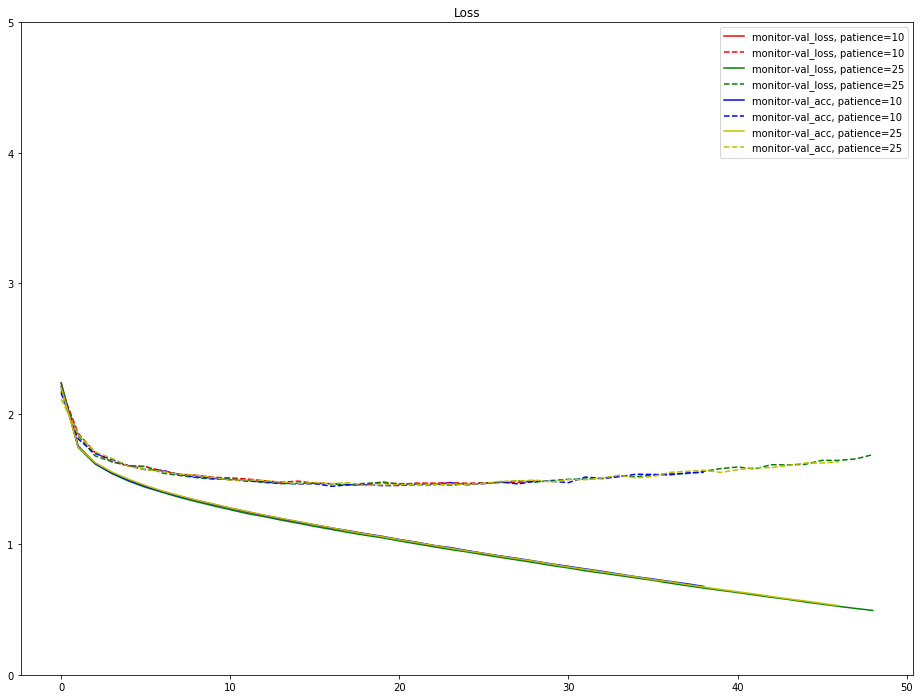

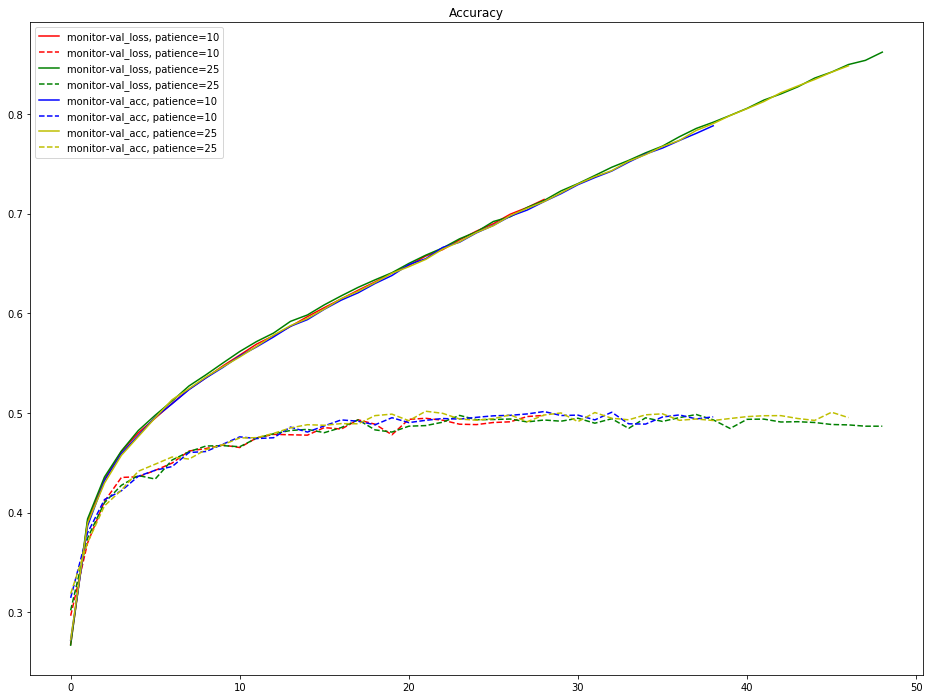

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y"]

plt.figure(figsize=(16,12))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(16,12))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()